# Project: Decision Trees and Random Forest - Loan Eligibility Prediction<br>
by Adam M. Lang<br>
November 26, 2020<br>

----
## Context: 
-------

Credit risk is nothing but the default in payment of any loan by the borrower. In the Banking sector this is an important factor to be considered before approving the loan of an applicant. Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

---------
## Objective:
------------
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

--------
## Attributes Information:
------------

* Variable:	------------------------------     Description
* Loan_ID:	-------------------------------          Unique Loan ID
* Gender:	  --------------------------------        Male/ Female
* Married:	-------------------------------          Applicant married (Y/N)
* Dependents:--------------------------	      Number of dependents
* Education:----------------------------      Applicant Education (Graduate/ Under Graduate)
* Self_Employed:--------------------	  Self employed (Y/N)
* ApplicantIncome:-----------------	  Applicant income
* CoapplicantIncome:------------- Coapplicant income
* LoanAmount:------------------------	      Loan amount in thousands
* Loan_Amount_Term:------------  Term of loan in months
* Credit_History:----------------------	  credit history meets guidelines
* Property_Area:----------------------	  Urban/ Semi Urban/ Rural
* Loan_Status:-------------------------	      Loan approved (Y/N)

---------------------------

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries and Load Dataset

In [117]:
import warnings
warnings.filterwarnings('ignore')

In [118]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [119]:
df = pd.read_csv('CreditRisk.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [120]:

print(df.shape)

(614, 13)


### Exploring data

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


In [122]:
# Lets analysze the distribution of the various attribute

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,141.166124,88.340630,0.0,98.0,125.0,164.75,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0
Loan_Status,614.0,0.687296,0.463973,0.0,0.0,1.0,1.00,1.0


**Insights:** `CoapplicantIncome and LoanAmount has 0's that can't happen so no need to fill these values`

In [123]:
df.nunique() # Number of unique values in a column

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

**Insights:**
- `Loan_Amount_Term is categorical as it has only 10 unique values`
- `Loan_ID column has all unique values and it not a continous column so it has 614 categories one for each row and that would not provide any info to the algorithm`

In [124]:
cr_df = df.drop('Loan_ID', axis =1 ) # dropping this column as it will be 1-1 mapping anyways
cr_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


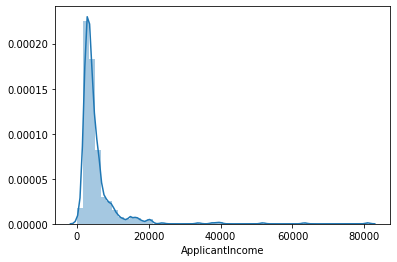

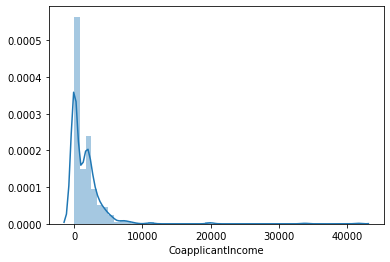

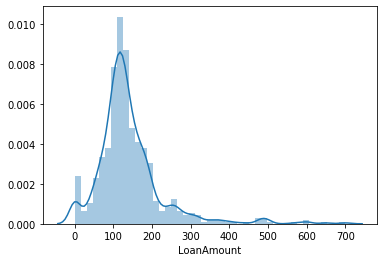

In [125]:
# distplot for continous columns
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    sns.distplot(df[i])
    plt.show()

In [126]:
cr_df['Loan_Amount_Term'].value_counts(normalize = True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

In [127]:
#The Loan_Amount_Term is highly skewed - so we will delete this column

cr_df.drop(['Loan_Amount_Term'], axis=1, inplace=True)

In [128]:
cr_df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

### Complete the below snippets to generate the countplots for all the categorical columns

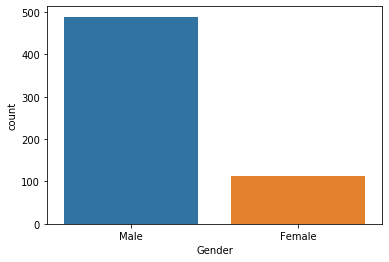

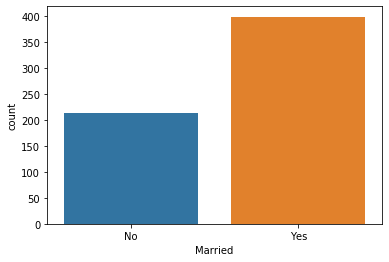

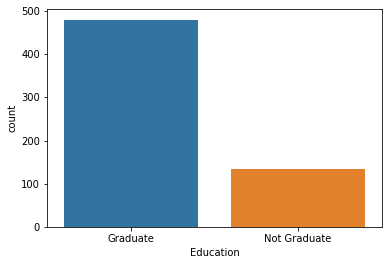

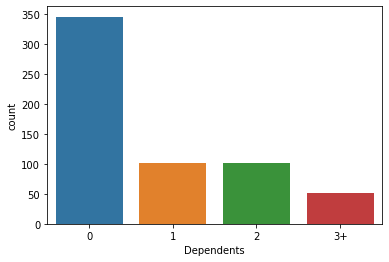

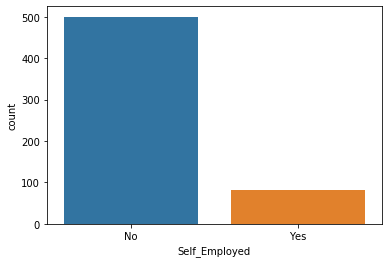

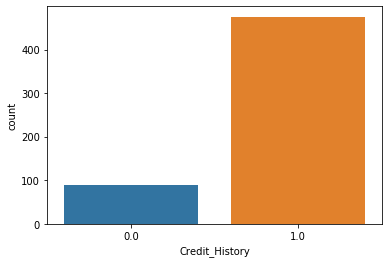

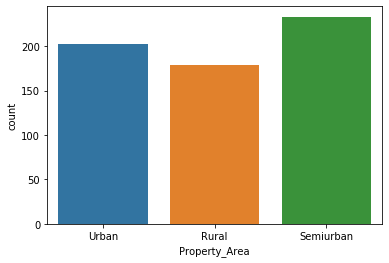

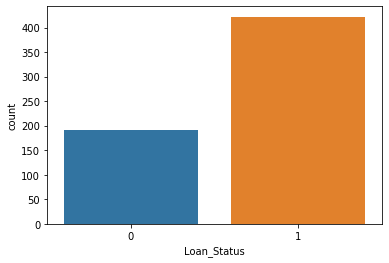

In [129]:
for i in ['Gender','Married','Education','Dependents','Self_Employed','Credit_History','Property_Area','Loan_Status']:
    sns.countplot(cr_df[i])
    plt.show()

### Null Values Treatment


In [130]:
cr_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [131]:
cr_df['Credit_History'].fillna(0,inplace=True)

cr_df['Self_Employed'].fillna('No',inplace=True) #replacing with mode

cr_df['Dependents'].fillna('0',inplace=True) #replacing with mode

In [132]:
#write a function to Fill null values in gender 
#where CoapplicantIncome is 0 with female and all other missing values as males. Comment on why this makes sense.
def f(x):
    if x['CoapplicantIncome'] == 0.0: return 'Female'
    elif x['CoapplicantIncome'] != 0.0: return 'Male'


cr_df['Gender'] = cr_df.apply(f, axis=1)

In [133]:
#check head of dataframe
cr_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Female,No,0,Graduate,No,5849,0.0,0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,1.0,Rural,0
2,Female,Yes,0,Graduate,Yes,3000,0.0,66,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,1.0,Urban,1
4,Female,No,0,Graduate,No,6000,0.0,141,1.0,Urban,1


In [134]:
# Drawing relationship between Loan_Status, Gender, Property_Area, Married

df.groupby(['Loan_Status','Gender','Property_Area'])['Married'].value_counts()

Loan_Status  Gender  Property_Area  Married
0            Female  Rural          No           7
                                    Yes          3
                     Semiurban      No          12
                                    Yes          1
                     Urban          No          10
                                    Yes          4
             Male    Rural          Yes         39
                                    No          18
                     Semiurban      Yes         27
                                    No          12
                     Urban          Yes         35
                                    No          19
1            Female  Rural          No          12
                                    Yes          2
                     Semiurban      No          22
                                    Yes         19
                     Urban          No          17
                                    Yes          2
             Male    Rural          Ye

In [135]:
cr_df[cr_df['Married'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
104,Male,NaN,0,Graduate,No,3816,754.0,160,1.0,Urban,1
228,Female,NaN,0,Graduate,No,4758,0.0,158,1.0,Semiurban,1
435,Female,NaN,0,Graduate,No,10047,0.0,0,1.0,Semiurban,1


**Insights:**
- `When Gender is Male Loan Status is 1 and Property_Area is Urban then mostly they are married.(mode)`

In [136]:
## Replacing with mode observed in above mentioned relationship:

cr_df.loc[104,'Married'] = 'Yes'
cr_df.loc[228,'Married'] = 'Yes'
cr_df.loc[435,'Married'] = 'No'

In [137]:
cr_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Bivariate Analysis


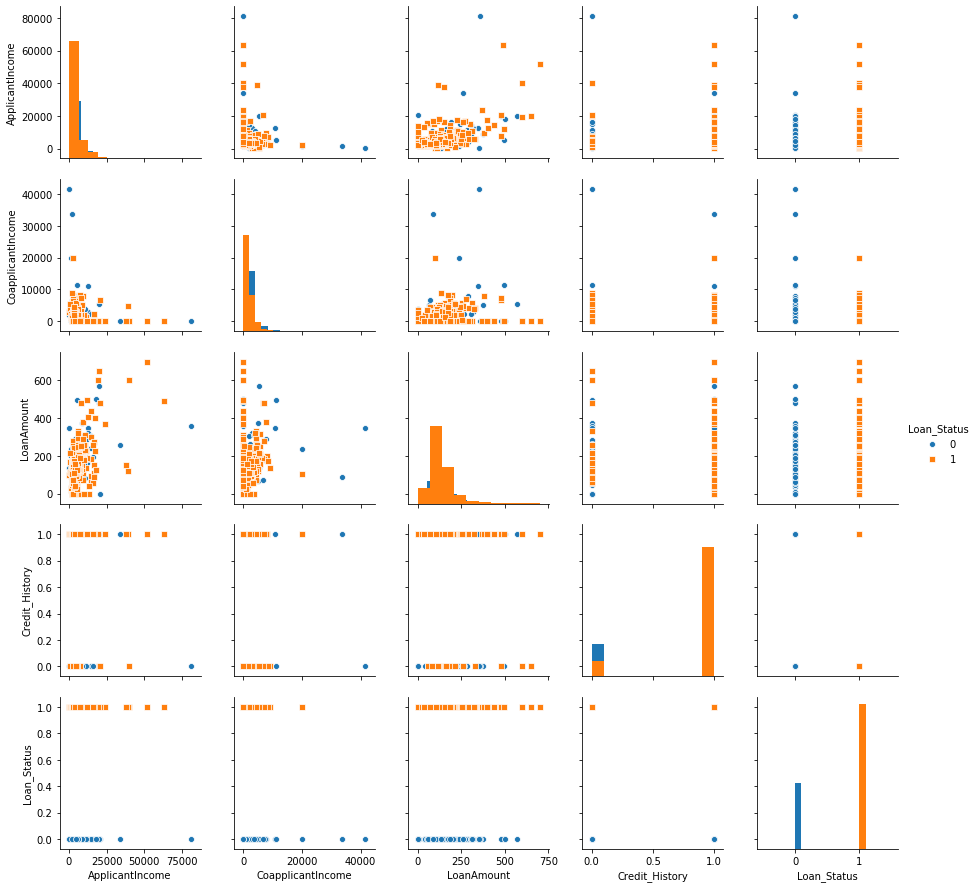

In [138]:
sns.pairplot(cr_df, hue = 'Loan_Status',diag_kind='hist',markers=["o","s"])

plt.show()

In [139]:
cr_df.groupby('Gender')['CoapplicantIncome'].median()
cr_df.groupby('Gender')['CoapplicantIncome'].mean()

Gender
Female       0.000000
Male      2919.193314
Name: CoapplicantIncome, dtype: float64

In [140]:
pd.crosstab(cr_df['Gender'],cr_df['Loan_Status'],normalize='index')

Loan_Status,0,1
Gender,,
Female,0.351648,0.648352
Male,0.281525,0.718475


In [141]:
pd.crosstab(cr_df['Married'],cr_df['Loan_Status'],normalize='index')

Loan_Status,0,1
Married,,
No,0.369159,0.630841
Yes,0.282500,0.717500


In [142]:
pd.crosstab(cr_df['Education'],cr_df['Loan_Status'],normalize='index')

Loan_Status,0,1
Education,,
Graduate,0.291667,0.708333
Not Graduate,0.388060,0.611940


In [143]:
pd.crosstab(cr_df['Self_Employed'],cr_df['Loan_Status'],normalize='columns')

Loan_Status,0,1
Self_Employed,,
No,0.864583,0.867299
Yes,0.135417,0.132701


**Insights:**
- `Self Employed people have same distribution, We should check how this feature influences final model using coefficients`

In [144]:
pd.crosstab(cr_df['Dependents'],cr_df['Loan_Status'],normalize='columns')

Loan_Status,0,1
Dependents,,
0,0.588542,0.585308
1,0.187500,0.156398
2,0.130208,0.180095
3+,0.093750,0.078199


In [145]:
pd.crosstab(cr_df['Property_Area'],cr_df['Loan_Status'],normalize='columns')

Loan_Status,0,1
Property_Area,,
Rural,0.359375,0.260664
Semiurban,0.281250,0.424171
Urban,0.359375,0.315166


### Data Preparation


In [146]:
# Define X and Y variables

X = cr_df.drop(columns = {'Loan_Status'})
Y = cr_df['Loan_Status'].astype('category')     

In [147]:
# Convert categorical vriables to dummy variables

X = pd.get_dummies(X, drop_first=True)

### Split the data into train, val and test set

In [148]:
## Split into training and test set
from sklearn.model_selection import train_test_split

# Split in train and test (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7, stratify = Y)
# Further splt the train into train and validation (70:30)
X_train, X_val, y_train, y_val =  train_test_split(X_train, y_train, test_size=0.30,random_state=7, stratify = y_train )

### Model building using Decision Trees

- Initialize the tree 
- Fit the train data on the tree model 
- Report the classification metrics on the train and validation set 
- Comment on which metric is more important if the cost of giving loan to a potential defaulter is very high and should be minimised through the modelling process. 
- Loop through the different values of max_depth to observe the recall on class 0 and figure out its best value to reduce overfitting. Also, keep in mind the performance on the val set. Report the results into a dataframe. 
- Fit the train data with the max_depth observed above. 
- Report the classification report on the test set and present the final observations.
 

In [149]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier


# initialise the decision tree criterion  = 'entropy'.
dtc =  DecisionTreeClassifier(criterion = 'entropy',random_state=42)

# fit the tree (fully grown) and report the metrics on the train set.

dtc.fit(X_train, y_train)

print(f"Classification Report for training set")
print(classification_report(y_train , dtc.predict(X_train)))

print(f"Clasification Report for validation set")
print(classification_report(y_val , dtc.predict(X_val)))

Classification Report for training set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       206

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Clasification Report for validation set
              precision    recall  f1-score   support

           0       0.46      0.45      0.46        40
           1       0.76      0.76      0.76        89

    accuracy                           0.67       129
   macro avg       0.61      0.61      0.61       129
weighted avg       0.66      0.67      0.67       129



**Comment on the metric here:** 
Comment on which metric is more important if the cost of giving loan to a potential defaulter is very high and should be minimized through the modeling process.
* The classification reports show us a perfect decision tree model was built using the training set. One thing we can see though is that there is significant class imbalance between the 0 (94 support) and 1 (206 support). 
* The classification report for the validation set shows the decision tree model has a much lower precision, recall, and f1-score for loan status 0 (no loan given) at 0.46, 0.45, 0.46 respectively. The precision, recall and f1-score for loan status 1 (loan given) is almost twice as high at 0.76 for all categories. The model accuracy is worse than for the training set at 0.67. 
* The results could be skewed though since the support for each group is not the same with imbalance in the validation set noted with support 40 for 0 and 89 for 1. This skews the metrics for the model predicting a loan was given (1) since there is more support to back it up. Therefore our model is potentially missing a significant prediction capacity for those that should not get a loan due to the low support given for this metric. 
* **The metric that is the most important here is the recall particularly for class 0. The Recall is the measure that correctly identifies true positives. The validation set shows us that we are correctly identifying the true positives (people who are not approved for a loan) 45% of the time which is significantly less than 76% of the time for predicting those who do get a loan.**

In [150]:
# import metrics

from sklearn.metrics import recall_score
dict_recall = {}

for max_depth in range(3,21):
    lista = []
    dtree = DecisionTreeClassifier(criterion = 'entropy',max_depth=max_depth, random_state=42)
    dtree.fit(X_train, y_train)
    lista.append(recall_score(y_train, dtree.predict(X_train), pos_label = 0))
    lista.append(recall_score(y_val, dtree.predict(X_val), pos_label = 0))
    dict_recall[max_depth] = lista

df = pd.DataFrame(dict_recall)
df.index = ['Train', 'Val']
df

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Train,0.531915,0.553191,0.617021,0.702128,0.776596,0.861702,0.978723,0.989362,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Val,0.525000,0.525000,0.450000,0.500000,0.525000,0.500000,0.450000,0.450000,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45


Text(0, 0.5, 'recall')

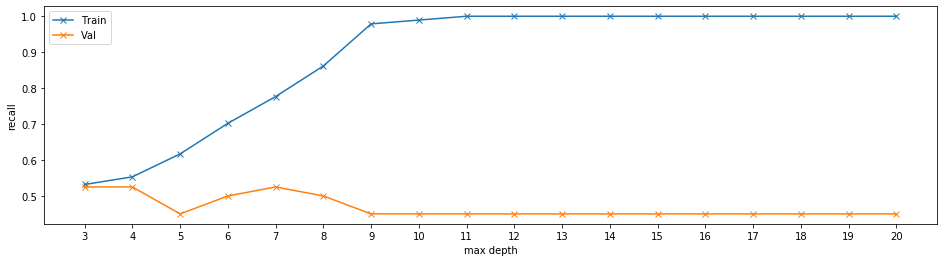

In [151]:
#plot recall
df.T.plot(marker='x', figsize=(16,4))
_ = plt.xticks(range(3,21,1)); plt.xlabel('max depth'); plt.ylabel('recall')

**Comments about the max_depth:**
* The tree is giving a recall of 1 for label 0 from 11 depth onwards. This depth seems to reduce the overfitting on the validation data but not on the training data. 

In [152]:
# instantiate decision tree classifier

dtcf = DecisionTreeClassifier(max_depth = 11, criterion='entropy', random_state=42)

# Fit the data on the train set here
dtcf.fit(X_train,y_train)
# Print the classification report on the test data here
print("********************Classification Report for the test data*****************************")
print(classification_report(y_test, dtcf.predict(X_test)))

********************Classification Report for the test data*****************************
              precision    recall  f1-score   support

           0       0.51      0.47      0.49        58
           1       0.77      0.80      0.78       127

    accuracy                           0.69       185
   macro avg       0.64      0.63      0.63       185
weighted avg       0.68      0.69      0.69       185



**Observations:**
* Using the max_depth of 11 the recall increased from 0.45 to 0.47 for 0 (not receiving a loan). 
* The precision also increased for 0 (not receiving a loan) from 0.46 to 0.51 meaning the ratio between the true positives and all the positives also known as the positive predictive value is improving for us to be able to predict who should not get a loan.
* The overall accuracy of the model increased from 0.67 to 0.69. 
* The model did improve also for our ability to predict who should get a loan (1) for recall from 0.76 to 0.80. 

### Visualize the tree 

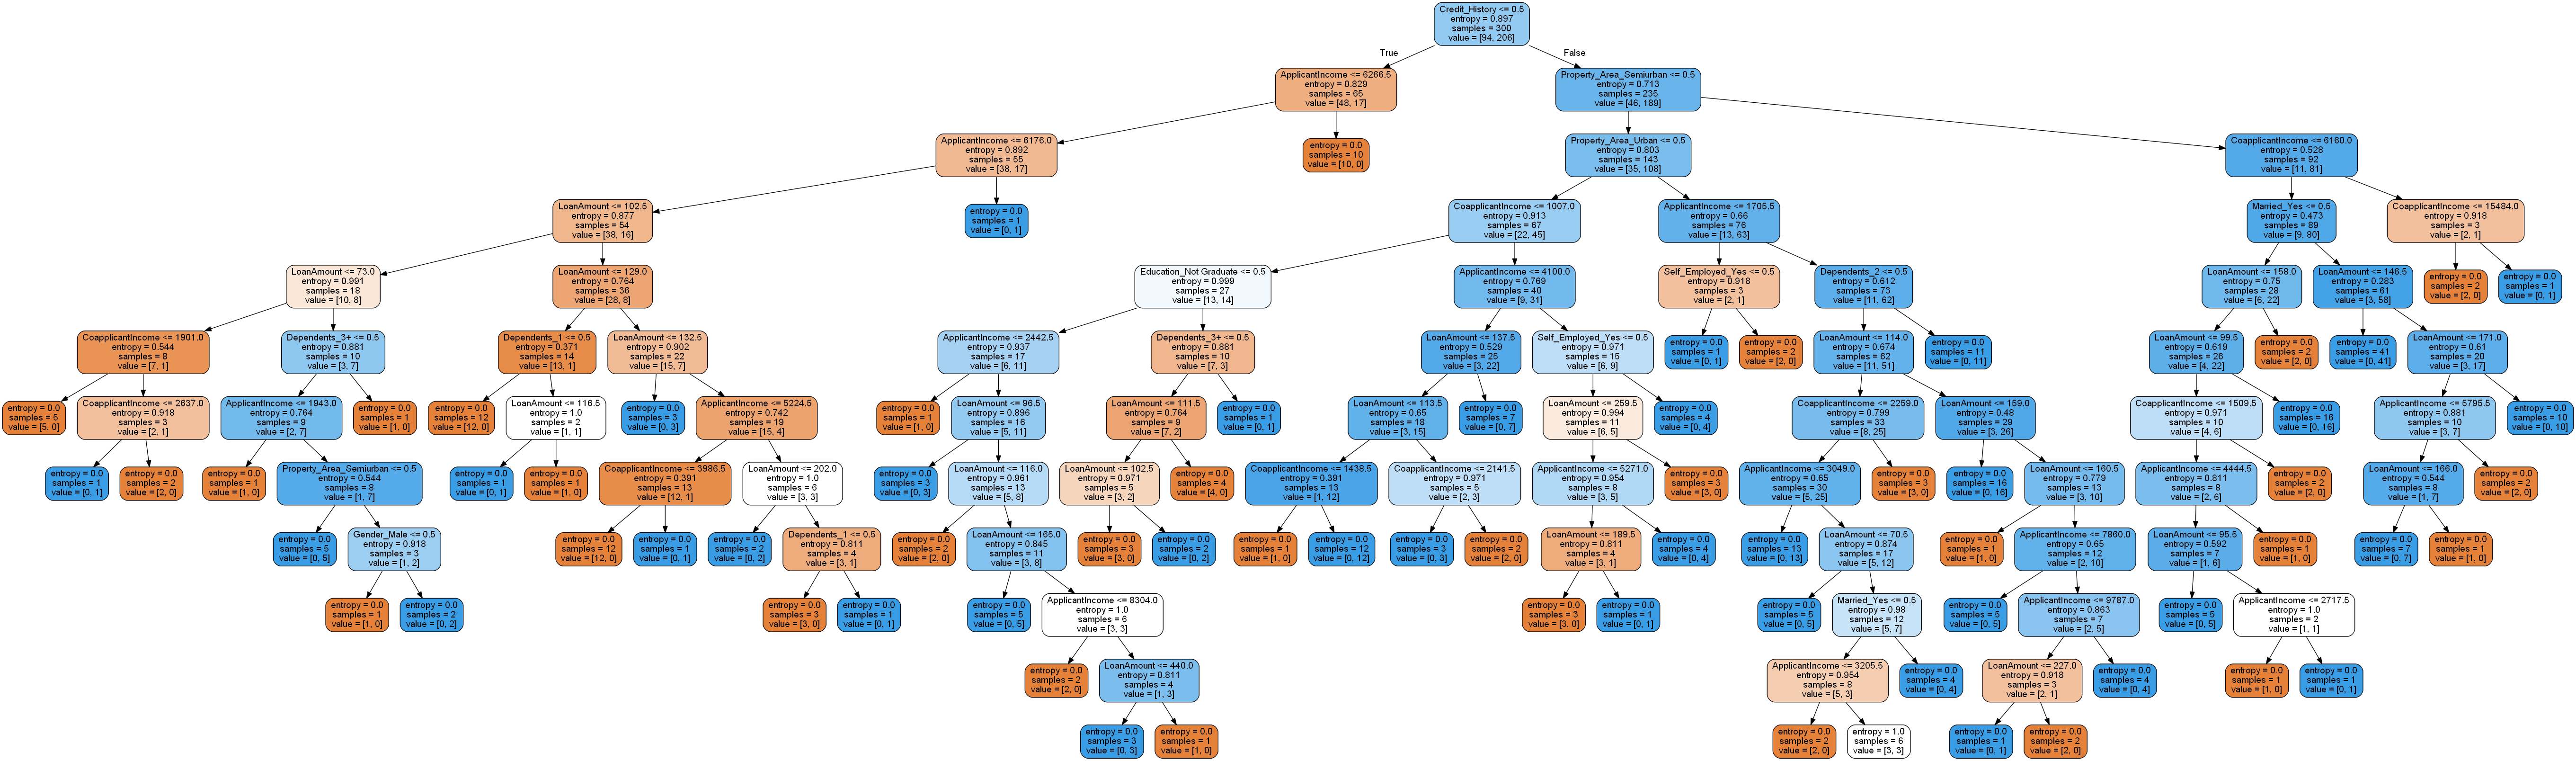

In [153]:
# import libraries

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

#Pass the columns of the train data as feature_names. 

dot_data = StringIO()
export_graphviz(dtcf, out_file=dot_data, filled  = True, rounded = True, feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

### Model building using Random Forests 

- Initiate a random forest model with criterion as 'entropy' and report the metrics on the train and the validation set. 
- try with different values of n_estimators and figure out the best based on the earlier logic. 
- Use the number of estimators figured out through the step above and build the final model. 
- Report the result on the test data and add observations. 

In [154]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy')  #initialise the model 

rf.fit(X_train, y_train)

#Report the metrics on the train and the validation set here
print("*****************for default 100 estimators*****************")
print(f"Classification Report for training data")
print(classification_report(y_train, rf.predict(X_train)))

print(f"Classification Report for validation data")
print(classification_report(y_val, rf.predict(X_val)))

*****************for default 100 estimators*****************
Classification Report for training data
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        94
           1       0.99      1.00      0.99       206

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.98       300
weighted avg       0.99      0.99      0.99       300

Classification Report for validation data
              precision    recall  f1-score   support

           0       0.59      0.55      0.57        40
           1       0.80      0.83      0.82        89

    accuracy                           0.74       129
   macro avg       0.70      0.69      0.69       129
weighted avg       0.74      0.74      0.74       129



**Observations**
* The recall is very high for both 0 (0.97) and 1 (1.00) for the training data with an accuracy of 0.99. 
* The validation data shows the recall drops for 0 to 0.47 and 1 to 0.82 with an accuracy of 0.71. The model performs worse on the validation data. This is with the default 100 estimators. 

In [155]:
# import recall score

from sklearn.metrics import recall_score
dict_recall = {}

for estimators in range(100,1001, 100):
    lista = []
    rfc = RandomForestClassifier(criterion = 'entropy',n_estimators = 22, random_state=42)
    rfc.fit(X_train, y_train)
    lista.append(recall_score(y_train, rfc.predict(X_train), pos_label = 0))
    lista.append(recall_score(y_val, rfc.predict(X_val), pos_label = 0))
    dict_recall[estimators] = lista

df = pd.DataFrame(dict_recall)
df.index = ['Train', 'Val']
df

,100,200,300,400,500,600,700,800,900,1000
Train,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
Val,0.575,0.575,0.575,0.575,0.575,0.575,0.575,0.575,0.575,0.575


In [156]:
rfcf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)

rfcf.fit(X_train, y_train)

# report the metrics on the test set here
print(f"Classification Report for testing data")
print(classification_report(y_test, rfcf.predict(X_test)))

Classification Report for testing data
              precision    recall  f1-score   support

           0       0.60      0.48      0.53        58
           1       0.78      0.85      0.82       127

    accuracy                           0.74       185
   macro avg       0.69      0.67      0.67       185
weighted avg       0.72      0.74      0.73       185



**Observations:** 
 * The best number of estimators figured out from earlier steps with the decision tree was 22. This yielded a training value of 1.00 for 100 to 1000 estimators. 
 * The final model fit on 100 estimators, the test data showed a recall of 0.48 for 0 and 0.85 for 1 with an accuracy of 0.74. This did change from the original validation model results which had a recall of 0.47 for 0 and 0.82 for 1 with an accuracy of 0.71. So this final model had improvement on the test data for predicting those who get a loan (1), the accuracy of the model, and the ability to predict those who should not get a loan (only by 0.01) but I attribute that to the fact that the support for the 0 column is significantly lower at 58 compared to 127 for the 1 column. This means the model will automatically always favor the column with the higher data values or imbalance in the dataset. 

### Business Insights 
- Present the insights/results from the project. 
- Comment on the issues that have led to the reported performance.

*Your response here*

* We can say that the Random Forest was the better model as compared to the Decision Tree. The Random Forest had a recall of 0.48 for 0 (not getting a loan) and recall of 0.85 for 1 (getting a loan). This was improved from the Decision Tree which was 0.47 and 0.80 for those values respectively. 
* The overall accuracy of the Random Forest model was 0.74 as compared to the Decision Tree which was 0.69. 
* The main goal of the project was to help predict those customers that are eligible for a loan. This time however we were focusing on the 0 variable (customers not eligible for a loan). The problem with this modeling process was that the dataset was imbalanced with almost twice as many data points (support) for the 1 variable (eligible for loan) than for the 0 variable (not getting a loan). So this will automatically make the model favor the dominant variable in its prediction power. 
* The Decision Tree model had a max depth of 11 which was the optimal number of branches we could grow on our tree to successfully reduce overfitting on the validation data and prevent overfitting on the training data. 
* The Decision Tree should be pruned as seen by the printed graphic of the tree. If we prune it we can reduce the entropy and increase the information gain thus improving the recall. 
* The Random Forest was fit on the same principle of max depth 11 but interestingly enough the n_estimators optimal was 22 which was twice that of the Decision Tree which led to an optimal n_estimators or trees of 100 with a training value of 1.00. Although 1.00 was obtained for n_estimators 100 to 1000, the 100 estimators was most optimal for final results. 
* Still we were able to obtain a 48% recall for predicting those who would not get a loan which is almost 50% so we can say that 1 out of every 2 customers we can predict successfully if they will not get a loan vs. almost 75% of the time or 3 out of 4 customers we will always be able to predict if they will get a loan. 
* I think to obtain better results we would need to re-balance the dataset so there are equal data points in both 0 and 1 variables so that the models do not favor one column over the other. 